# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Creating Dataframe
cols = ['City','Country','Latitude','Longitude','Temp(F)','Humidity','Cloudiness','Wind Speed']
df = pd.DataFrame(columns=cols)


# Making API Call
url = 'http://api.openweathermap.org/data/2.5/weather?''
count = 0

print('Beginning Data Retrieval')    
print('-----------------------------')
for city in cities:
    count += 1
    target_url = url + "appid=" + api_key + "&units=IMPERIAL&" + 'q=' + city
    res = requests.get(target_url).json()
    if res["cod"] == "404":
        print('City not found. Skipping...')
    else:
        df.at[count, 'City'] = res['name']
        df.at[count, 'Country'] = res['sys']['country']
        df.at[count, 'Latitude'] = res['coord']['lat']
        df.at[count, 'Longitude'] = res['coord']['lon']
        df.at[count, 'Temp(F)'] = res['main']['temp']
        df.at[count, 'Humidity'] = res['main']['humidity']
        df.at[count, 'Cloudiness'] = res['clouds']['all']
        df.at[count, 'Wind Speed'] = res['wind']['speed']
        print('Processing Record ', count , 'of', len(cities),' | ', city)
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record  1 of 607  |  kyzyl-suu
Processing Record  2 of 607  |  buin
Processing Record  3 of 607  |  albany
Processing Record  4 of 607  |  kyshtovka
Processing Record  5 of 607  |  cherskiy
Processing Record  6 of 607  |  kapaa
Processing Record  7 of 607  |  vung tau
Processing Record  8 of 607  |  svetlogorsk
Processing Record  9 of 607  |  puerto ayora
Processing Record  10 of 607  |  pevek
Processing Record  11 of 607  |  aklavik
Processing Record  12 of 607  |  taltal
Processing Record  13 of 607  |  saint george
Processing Record  14 of 607  |  vestmannaeyjar
Processing Record  15 of 607  |  busselton
Processing Record  16 of 607  |  thompson
Processing Record  17 of 607  |  hof
Processing Record  18 of 607  |  jamestown
Processing Record  19 of 607  |  souillac
Processing Record  20 of 607  |  kavieng
Processing Record  21 of 607  |  mataura
Processing Record  22 of 607  |  ponta delgada
Processing Record  23 of 6

Processing Record  200 of 607  |  irbit
Processing Record  201 of 607  |  piterka
Processing Record  202 of 607  |  pauini
City not found. Skipping...
Processing Record  204 of 607  |  rocha
Processing Record  205 of 607  |  tuktoyaktuk
Processing Record  206 of 607  |  clyde river
Processing Record  207 of 607  |  bhanjanagar
Processing Record  208 of 607  |  hay river
Processing Record  209 of 607  |  isangel
Processing Record  210 of 607  |  lorengau
Processing Record  211 of 607  |  sacramento
Processing Record  212 of 607  |  xining
Processing Record  213 of 607  |  maldonado
Processing Record  214 of 607  |  chara
Processing Record  215 of 607  |  carutapera
Processing Record  216 of 607  |  poum
Processing Record  217 of 607  |  cheney
Processing Record  218 of 607  |  kichmengskiy gorodok
Processing Record  219 of 607  |  virginia beach
Processing Record  220 of 607  |  honiara
Processing Record  221 of 607  |  tasiilaq
Processing Record  222 of 607  |  taywarah
Processing Reco

Processing Record  399 of 607  |  omsukchan
Processing Record  400 of 607  |  nguruka
Processing Record  401 of 607  |  pisco
City not found. Skipping...
Processing Record  403 of 607  |  grand gaube
Processing Record  404 of 607  |  muli
Processing Record  405 of 607  |  sinnamary
Processing Record  406 of 607  |  kanniyakumari
Processing Record  407 of 607  |  tulun
Processing Record  408 of 607  |  andijon
Processing Record  409 of 607  |  erzin
Processing Record  410 of 607  |  magistralnyy
City not found. Skipping...
Processing Record  412 of 607  |  geraldton
Processing Record  413 of 607  |  ituango
Processing Record  414 of 607  |  umm lajj
Processing Record  415 of 607  |  qatana
Processing Record  416 of 607  |  saint-denis
Processing Record  417 of 607  |  hadejia
Processing Record  418 of 607  |  kolding
Processing Record  419 of 607  |  vardo
Processing Record  420 of 607  |  jiayuguan
Processing Record  421 of 607  |  opuwo
Processing Record  422 of 607  |  petropavlovsk-

Processing Record  593 of 607  |  myingyan
Processing Record  594 of 607  |  cradock
Processing Record  595 of 607  |  prince albert
Processing Record  596 of 607  |  nouadhibou
Processing Record  597 of 607  |  durusu
Processing Record  598 of 607  |  canmore
Processing Record  599 of 607  |  awbari
Processing Record  600 of 607  |  puerto del rosario
Processing Record  601 of 607  |  thinadhoo
Processing Record  602 of 607  |  okha
City not found. Skipping...
Processing Record  604 of 607  |  zhigalovo
Processing Record  605 of 607  |  myitkyina
Processing Record  606 of 607  |  kondinskoye
Processing Record  607 of 607  |  campechuela
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Export Dataframe to CSV
df.to_csv(output_data_file, index=False)
print(df)



                   City Country Latitude Longitude Temp(F) Humidity  \
1             Kyzyl-Suu      KG    42.34        78   33.54      100   
2                  Buin      CL   -33.73    -70.74    75.9       16   
3                Albany      US    42.65    -73.75   39.06       33   
4             Kyshtovka      RU    56.56     76.62   11.58       76   
5              Cherskiy      RU    68.75     161.3  -15.69       69   
6                 Kapaa      US    22.08   -159.32    74.1       60   
7              Vung Tau      VN    10.35    107.08   81.78       94   
8           Svetlogorsk      RU    53.14     59.15      23       85   
9          Puerto Ayora      EC    -0.74    -90.35    82.6       62   
10                Pevek      RU     69.7    170.27   -9.12       99   
11              Aklavik      CA    68.22   -135.01   24.04       73   
12               Taltal      CL   -25.41    -70.49   70.53       67   
13         Saint George      GR    39.45     22.34   51.69       81   
14    

In [17]:
print(df.head())

        City Country Latitude Longitude Temp(F) Humidity Cloudiness Wind Speed
1  Kyzyl-Suu      KG    42.34        78   33.54      100         92       5.17
2       Buin      CL   -33.73    -70.74    75.9       16          0      11.41
3     Albany      US    42.65    -73.75   39.06       33         40      17.22
4  Kyshtovka      RU    56.56     76.62   11.58       76         24       2.93
5   Cherskiy      RU    68.75     161.3  -15.69       69         76        6.4


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

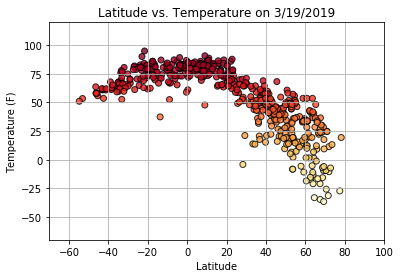

In [56]:
plt.scatter(df['Latitude'], 
            df['Temp(F)'], c = df['Temp(F)'],
            edgecolor = 'black', linewidths = 1, marker = 'o', 
            cmap = 'YlOrRd', alpha = 0.8, label = 'City')

plt.title('Latitude vs. Temperature on 3/19/2019')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim([-70, 100])
plt.ylim([-70, 120])

plt.savefig('images/lat-temp.png')
plt.show()

#### Latitude vs. Humidity Plot

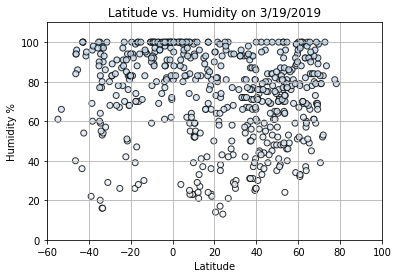

In [57]:
plt.scatter(df['Latitude'], 
            df['Humidity'], c = df['Humidity'],
            edgecolor = 'black', linewidths = 1, marker = 'o', 
            cmap = 'Blues', alpha = 0.8, label = 'City')

plt.title('Latitude vs. Humidity on 3/19/2019')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim([-60, 100])
plt.ylim([0, 110])

plt.savefig('images/lat-humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

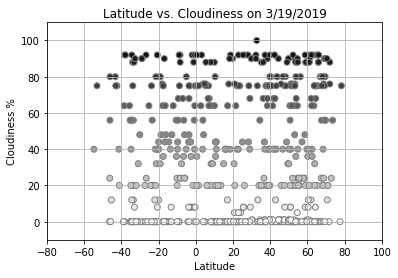

In [58]:
plt.scatter(df['Latitude'], 
            df['Cloudiness'], c = df['Cloudiness'],
            edgecolor = 'grey', linewidths = 1, marker = 'o', 
            cmap = 'binary', alpha = 1, label = 'City')

plt.title('Latitude vs. Cloudiness on 3/19/2019')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 110])

plt.savefig('images/lat-cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

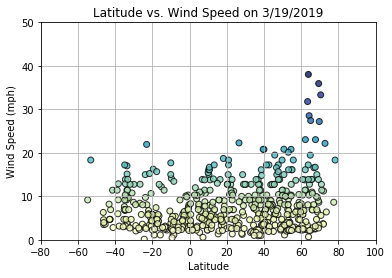

In [59]:
plt.scatter(df['Latitude'], 
            df['Wind Speed'], c = df['Wind Speed'],
            edgecolor = 'black', linewidths = 1, marker = 'o', 
            cmap = 'YlGnBu', alpha = 0.8, label = 'City')

plt.title('Latitude vs. Wind Speed on 3/19/2019')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 50])

plt.savefig('images/lat-windspeed.png')
plt.show()

# Observations

1. Cities close to the equator have the highest temperatures.
2. Cloudiness is not correlated to a city's latitude
3. A majority of cities see wind speeds below 20mph.